In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

url="http://localhost:3030/iot"

In [25]:
df = pd.read_json(url)

In [26]:
df

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,61b46f86eb92edde63e796b9,2021-12-11 18:29:42.649,-0.87,-0.29,1.20,-67.57,15.50,18.55,-29.87,62.65,-3.82
1,61b46f87eb92edde63e796bb,2021-12-11 18:29:43.653,-0.24,0.23,0.97,23.68,14.10,-88.07,-33.51,22.88,-17.96
2,61b46f88eb92edde63e796bd,2021-12-11 18:29:44.658,-0.66,-1.11,1.61,-147.89,-131.10,-55.54,1.75,18.95,-35.84
3,61b46f89eb92edde63e796bf,2021-12-11 18:29:45.664,0.43,0.63,0.50,-102.84,144.96,195.13,-7.03,49.23,-28.23
4,61b46f8aeb92edde63e796c1,2021-12-11 18:29:46.668,-1.43,-0.25,1.02,383.48,-75.56,-440.06,-42.02,23.00,-4.31
...,...,...,...,...,...,...,...,...,...,...,...
21290,61b898aecefcd2796cb28db0,2021-12-14 22:14:22.975,-0.72,0.74,0.52,3.60,-176.70,644.78,33.86,7.36,14.23
21291,61b898afcefcd2796cb28db2,2021-12-14 22:14:23.980,-1.42,-0.28,0.41,38.70,204.47,219.18,-34.69,36.10,3.91
21292,61b898b0cefcd2796cb28db4,2021-12-14 22:14:24.985,0.16,-0.54,-0.84,-241.94,-160.52,-27.59,-9.45,55.93,8.98
21293,61b898b1cefcd2796cb28db6,2021-12-14 22:14:25.990,0.21,0.63,-0.71,-320.37,-101.38,-76.17,-2.25,32.87,42.96


In [27]:
df.loc[:,'accel_x']+df.loc[:,'accel_y']+df.loc[:,'accel_z']

0        0.04
1        0.96
2       -0.16
3        1.56
4       -0.66
         ... 
21290    0.54
21291   -1.29
21292   -1.22
21293    0.13
21294    0.58
Length: 21295, dtype: float64

In [28]:
df.insert(0, 'accel', round(np.sqrt(df.loc[:,'accel_x']**2+df.loc[:,'accel_y']**2+df.loc[:,'accel_z']**2), 2), allow_duplicates=False)
df.insert(0, 'gyro', round(np.sqrt(df.loc[:,'gyro_x']**2+df.loc[:,'gyro_y']**2+df.loc[:,'gyro_z']**2), 2), allow_duplicates=False)
df.insert(0, 'mag', round(np.sqrt(df.loc[:,'mag_x']**2+df.loc[:,'mag_y']**2+df.loc[:,'mag_z']**2), 2), allow_duplicates=False)
df = df[['date', 'accel_x', 'accel_y', 'accel_z', 'accel', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro', 'mag_x', 'mag_y', 'mag_z', 'mag']]

In [29]:
df.head()

,date,accel_x,accel_y,accel_z,accel,gyro_x,gyro_y,gyro_z,gyro,mag_x,mag_y,mag_z,mag
0,2021-12-11 18:29:42.649,-0.87,-0.29,1.20,1.51,-67.57,15.50,18.55,71.76,-29.87,62.65,-3.82,69.51
1,2021-12-11 18:29:43.653,-0.24,0.23,0.97,1.03,23.68,14.10,-88.07,92.28,-33.51,22.88,-17.96,44.37
2,2021-12-11 18:29:44.658,-0.66,-1.11,1.61,2.06,-147.89,-131.10,-55.54,205.29,1.75,18.95,-35.84,40.58
3,2021-12-11 18:29:45.664,0.43,0.63,0.50,0.91,-102.84,144.96,195.13,263.94,-7.03,49.23,-28.23,57.18
4,2021-12-11 18:29:46.668,-1.43,-0.25,1.02,1.77,383.48,-75.56,-440.06,588.57,-42.02,23.00,-4.31,48.10


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21295 entries, 0 to 21294
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     21295 non-null  datetime64[ns]
 1   accel_x  21295 non-null  float64       
 2   accel_y  21295 non-null  float64       
 3   accel_z  21295 non-null  float64       
 4   accel    21295 non-null  float64       
 5   gyro_x   21295 non-null  float64       
 6   gyro_y   21295 non-null  float64       
 7   gyro_z   21295 non-null  float64       
 8   gyro     21295 non-null  float64       
 9   mag_x    21295 non-null  float64       
 10  mag_y    21295 non-null  float64       
 11  mag_z    21295 non-null  float64       
 12  mag      21295 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 2.1 MB


In [31]:
df.isnull().sum()

date       0
accel_x    0
accel_y    0
accel_z    0
accel      0
gyro_x     0
gyro_y     0
gyro_z     0
gyro       0
mag_x      0
mag_y      0
mag_z      0
mag        0
dtype: int64

In [32]:
df.describe()

,accel_x,accel_y,accel_z,accel,gyro_x,gyro_y,gyro_z,gyro,mag_x,mag_y,mag_z,mag
count,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000,21295.000000
mean,-0.069497,0.044722,-0.270908,1.007268,-1.359200,0.852052,2.218759,31.740257,-28.649450,27.481356,17.128565,54.127689
std,0.273987,0.405974,0.850939,0.168416,66.309936,64.000813,80.948306,118.514735,14.447028,15.320172,32.496593,20.952385
min,-4.000000,-2.960000,-1.950000,0.080000,-1944.150000,-1298.160000,-1244.080000,0.200000,-142.860000,-33.060000,-89.620000,9.700000
25%,-0.110000,-0.040000,-0.930000,0.970000,1.830000,-0.670000,-0.180000,1.940000,-35.060000,14.865000,-14.320000,41.800000
50%,-0.060000,0.020000,-0.780000,0.970000,1.950000,-0.550000,-0.120000,2.030000,-31.680000,28.780000,28.280000,50.450000
75%,-0.010000,0.290000,0.880000,1.020000,2.010000,-0.430000,-0.060000,2.160000,-27.400000,39.320000,35.660000,63.090000
max,1.570000,3.570000,2.810000,5.380000,1914.370000,1045.350000,976.620000,2215.740000,104.540000,66.520000,188.600000,215.160000


<AxesSubplot:title={'center':'Accelerometer Sensor'}, xlabel='date'>

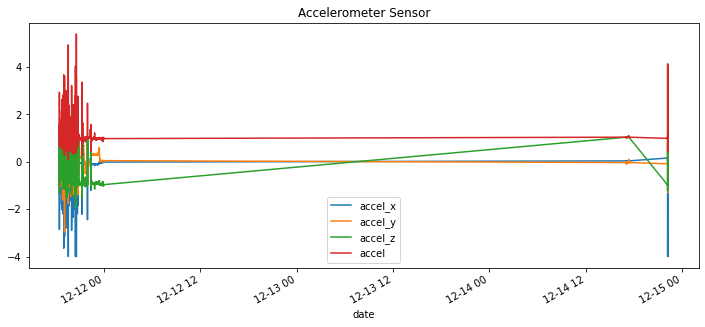

In [33]:
df.plot(x='date', y=['accel_x','accel_y','accel_z','accel'], figsize=(12,5), title="Accelerometer Sensor")

<AxesSubplot:title={'center':'Accelerometer Sensor'}, xlabel='date'>

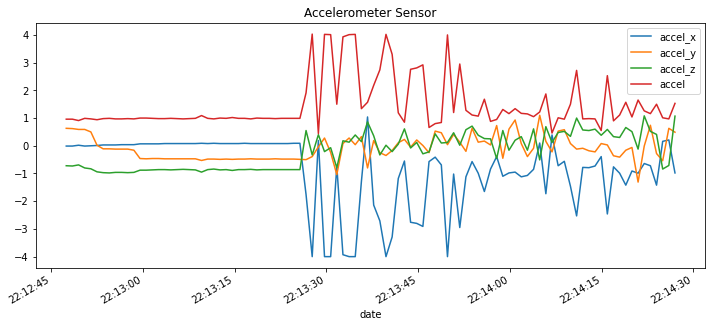

In [34]:
df.tail(100).plot(x='date', y=['accel_x','accel_y','accel_z','accel'], figsize=(12,5), title="Accelerometer Sensor")

<AxesSubplot:title={'center':'Gyro Sensor'}, xlabel='date'>

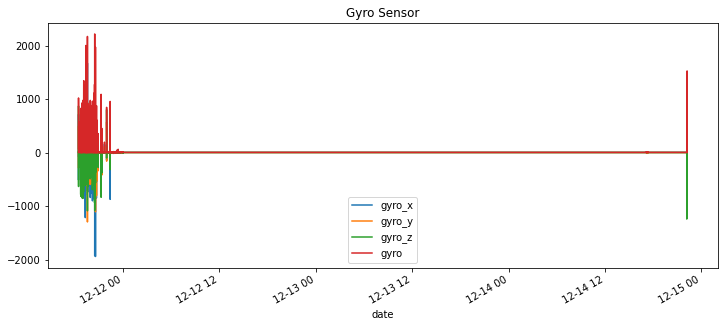

In [35]:
df.plot(x='date', y=['gyro_x','gyro_y','gyro_z','gyro'], figsize=(12,5), title="Gyro Sensor")

<AxesSubplot:title={'center':'Gyro Sensor'}, xlabel='date'>

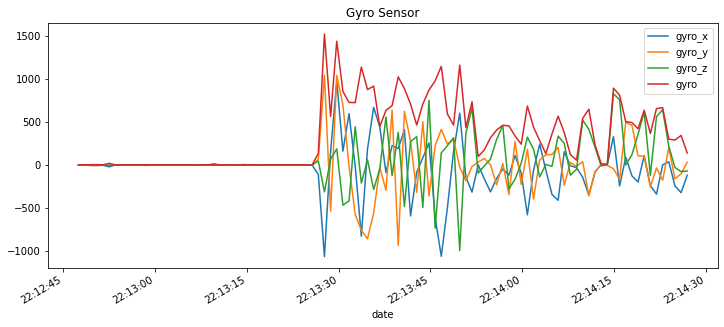

In [36]:
df.tail(100).plot(x='date', y=['gyro_x','gyro_y','gyro_z','gyro'], figsize=(12,5), title="Gyro Sensor")

<AxesSubplot:title={'center':'Magnetic Sensor'}, xlabel='date'>

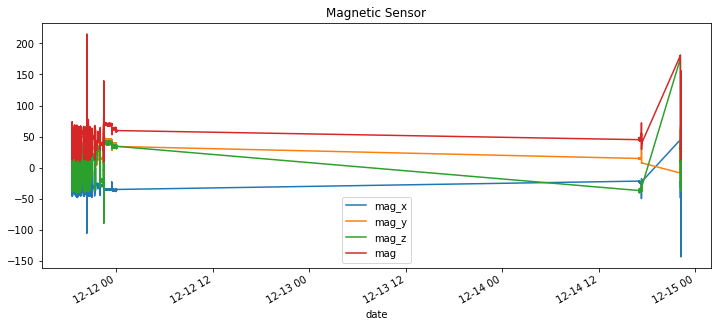

In [37]:
df.plot(x='date', y=['mag_x','mag_y','mag_z','mag'], figsize=(12,5), title="Magnetic Sensor")

<AxesSubplot:title={'center':'Sensors'}, xlabel='date'>

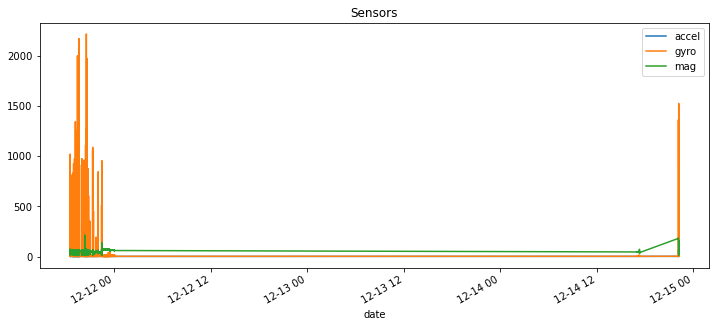

In [38]:
df.plot(x='date', y=['accel', 'gyro', 'mag'], figsize=(12,5), title="Sensors")

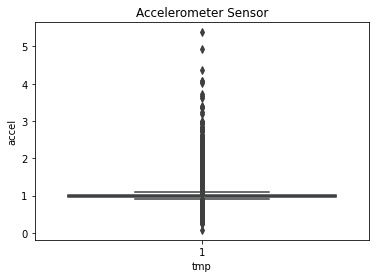

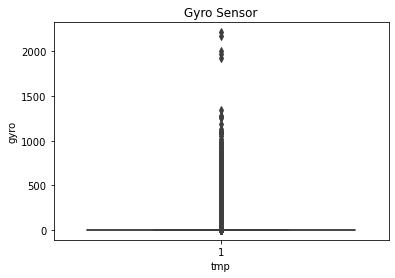

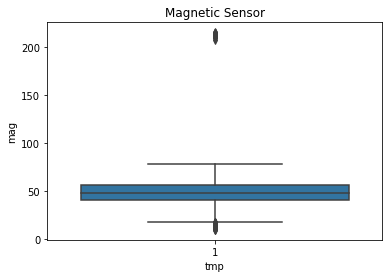

In [39]:
df2 = df.copy()
df2.insert(0,'tmp',1)

plt.title("Accelerometer Sensor")
sns.boxplot(x='tmp', y='accel',data=df2)
plt.show()

plt.title('Gyro Sensor')
sns.boxplot(x='tmp', y='gyro', data=df2)
plt.show()

plt.title('Magnetic Sensor')
sns.boxplot(x='tmp', y='mag', data=df2)
plt.show()

In [40]:
df2 = df.copy()
df2.insert(0,'','Accel')

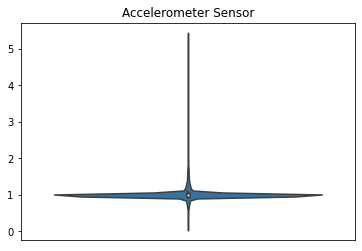

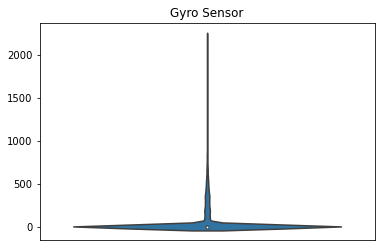

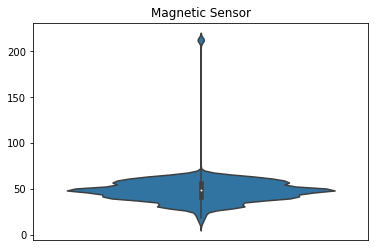

In [49]:
plt.title("Accelerometer Sensor")
sns.violinplot(x='', y='accel',data=df2)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel('')
plt.show()

plt.title('Gyro Sensor')
sns.violinplot(x='', y='gyro', data=df2)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel('')
plt.show()

plt.title('Magnetic Sensor')
sns.violinplot(x='', y='mag', data=df2)

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.ylabel('')
plt.show()

<AxesSubplot:title={'center':'Mean of Accel, Gyro and Mag'}>

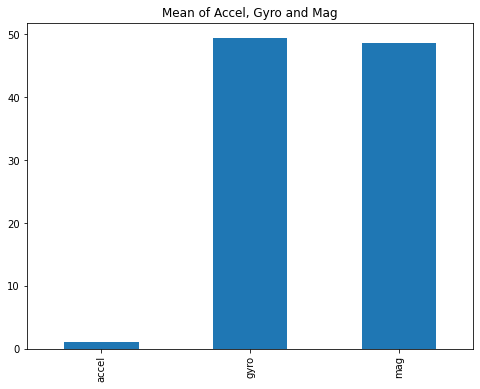

In [30]:
df[['accel', 'gyro', 'mag']].mean().plot.bar(figsize=(8,6), title='Mean of Accel, Gyro and Mag')

In [53]:
df_sq=df[['date','accel', 'gyro', 'mag']];df_sq.head()

,date,accel,gyro,mag
0,2021-12-11 18:29:42.649,1.51,71.76,69.51
1,2021-12-11 18:29:43.653,1.03,92.28,44.37
2,2021-12-11 18:29:44.658,2.06,205.29,40.58
3,2021-12-11 18:29:45.664,0.91,263.94,57.18
4,2021-12-11 18:29:46.668,1.77,588.57,48.10


In [54]:
df_sq.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

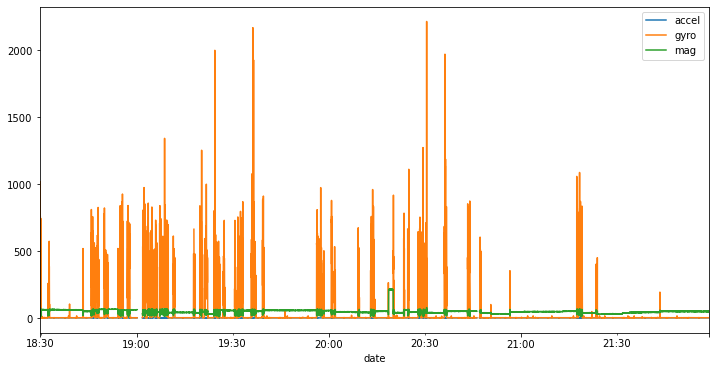

In [57]:
df_sq.resample('1S').mean().plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

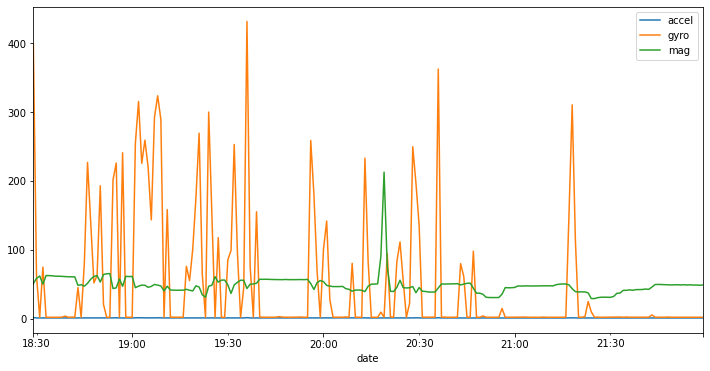

In [55]:
df_sq.resample('60S').mean().plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

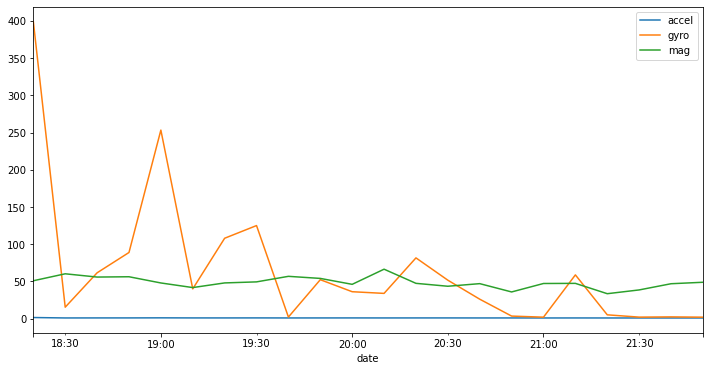

In [56]:
df_sq.resample('600S').mean().plot(figsize=(12,6))